In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import geopandas as gpd
import xarray as xr
import wget
import requests
import netCDF4 as nc4
import cartopy.crs as ccrs

In [3]:
ibge = gpd.read_file(r"D:\GU\IC\Scripts\Data\IBGE\BiomasBrasil.shp")
shp_cerrado = ibge[ibge.biomas == 'CERRADO']
hue_order = ['Central', 'Southern','Eastern']
import regionmask
regions = gpd.read_file(r'D:\GU\IC\Scripts\Data\regions1.geojson')
cerrado_mask = regionmask.Regions([regions.geometry.values[0], regions.geometry.values[1], regions.geometry.values[2]], names=['Central', 'Southern', 'Eastern'], abbrevs=['C', 'S', 'E'], name = 'Cerrado Regions')


In [5]:
datasets = ['chirps','mswep', 'xavier', 'era5', 'imerg', 'gpcc ']
datasets_names = ['CHIRPS','MSWEP', 'Xavier', 'ERA5', 'IMERG', 'GPCC']

In [7]:
dataset = datasets[3]
name = datasets_names[3]

In [14]:
ds = xr.open_dataset("daily_datasets\CDD\\"+ dataset +  ".nc", chunks={'time': -1, 'lat': 10, 'lon': 10})

# seasonal

In [122]:
ds_5 = ds.where(ds.CDD >= 5).groupby('time.season').count(dim='time')
ds_7 = ds.where(ds.CDD >= 7).groupby('time.season').count(dim='time')
ds_10 = ds.where(ds.CDD >= 10).groupby('time.season').count(dim='time')
ds_15 = ds.where(ds.CDD >= 15).groupby('time.season').count(dim='time')
ds_20 = ds.where(ds.CDD >= 20).groupby('time.season').count(dim='time')
#take all dataarrays  and create a new dataset, with thresoold as a dimension
ds_new = xr.concat([ds_5, ds_7, ds_10, ds_15, ds_20], dim='threshold').load()
ds_new.coords['threshold'] = [5, 7, 10, 15, 20]
#divide by 40 years to get the frequency
ds_new = ds_new/40



C:\Users\luisg\AppData\Local\Temp\ipykernel_2524\4048395762.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


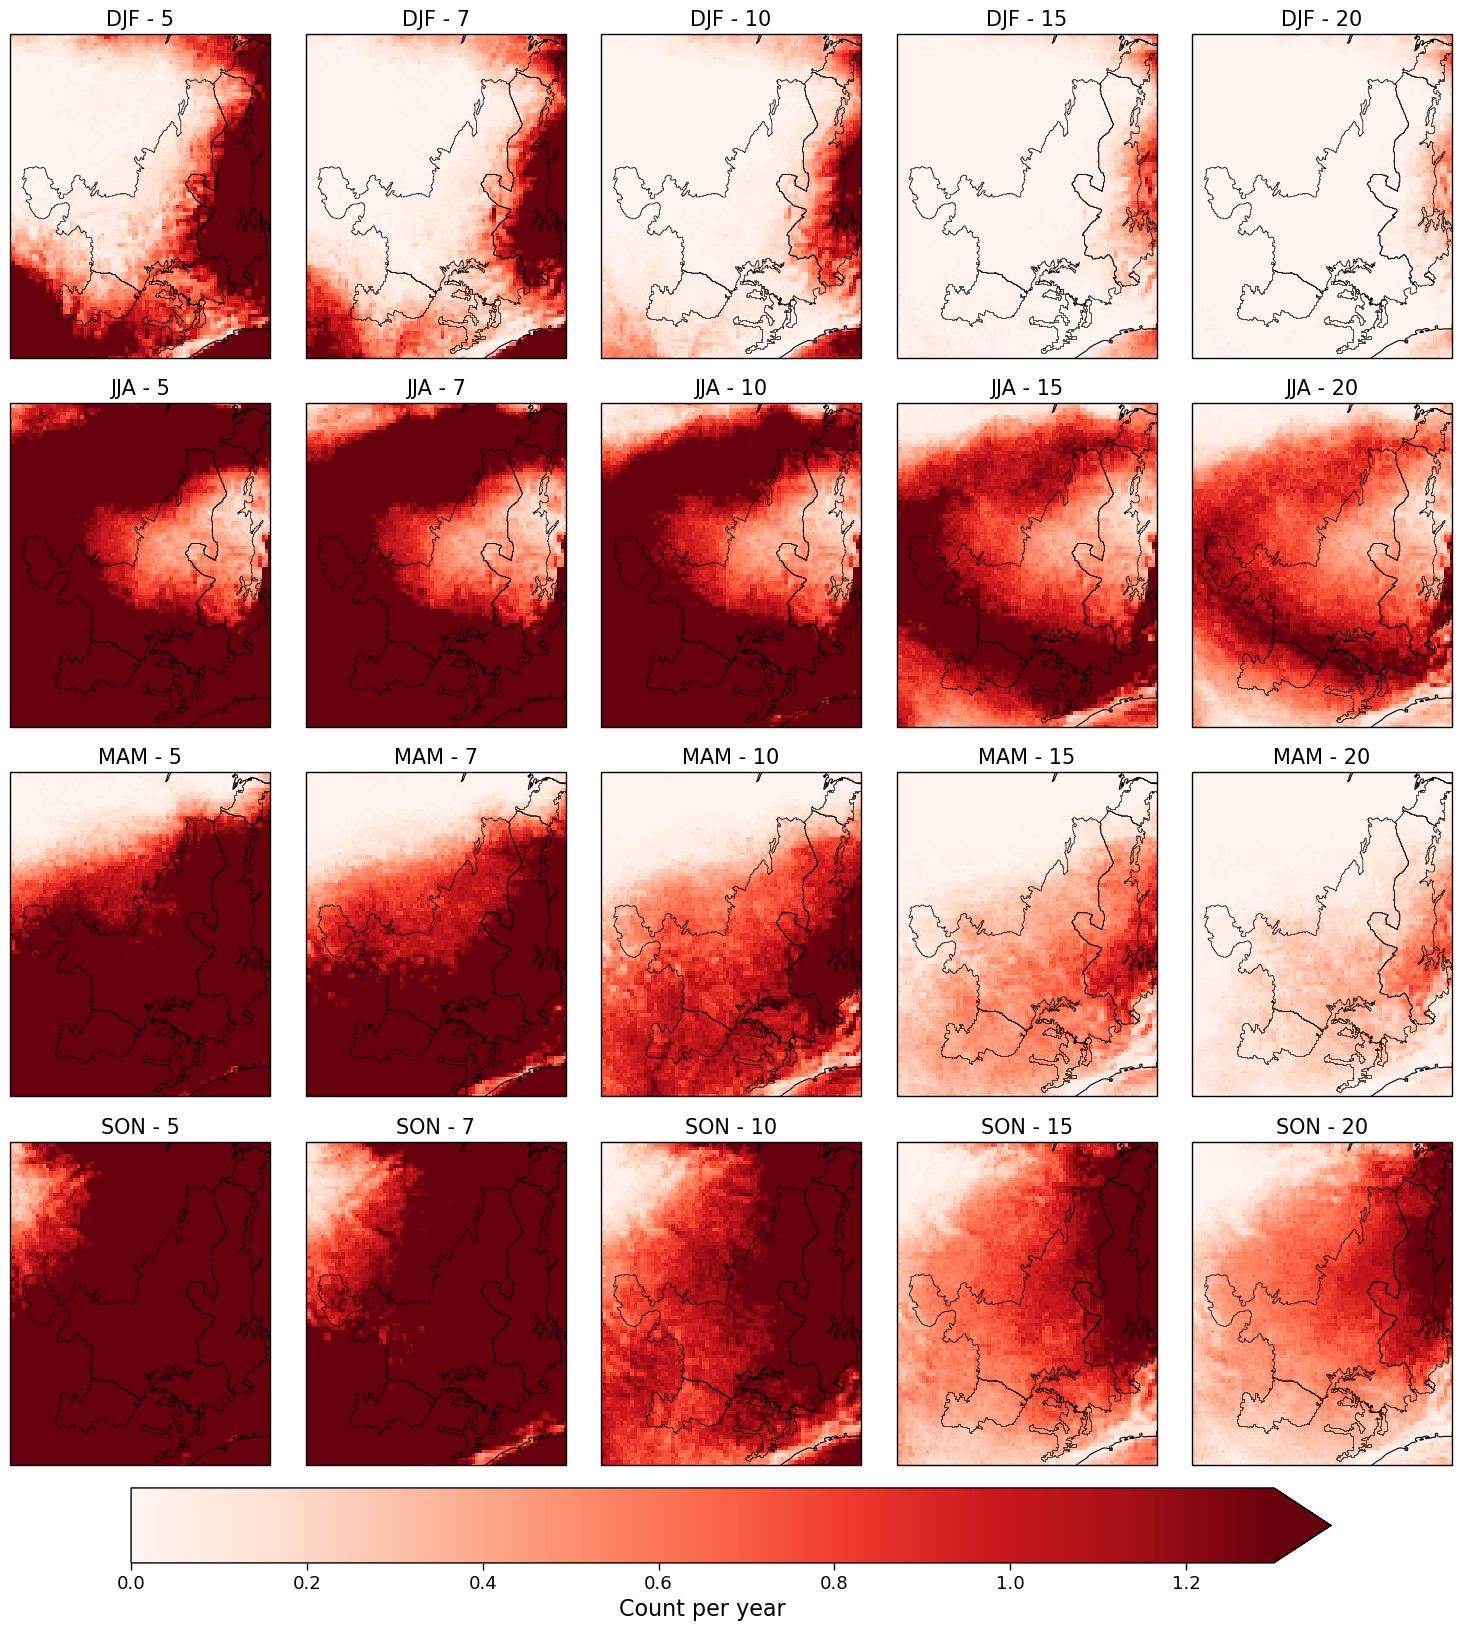

In [51]:
fs = 16
sns.set_context("paper",  rc={"font.size":fs-1,"axes.titlesize":15,"axes.labelsize":fs}) 

#now plot a 4x5 grid with the 5 thresholds and 4 seasons
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})
#loop over the thresholds
for i, threshold in enumerate(ds_new.threshold):
    #loop over the seasons
    for j, season in enumerate(ds_new.season):
        #plot the dataarray
        im = ds_new.sel(season=season, threshold=threshold).CDD.plot(ax=axes[j, i], cmap='Reds', add_colorbar=False, vmin=0, vmax=1.3, extend='max')
        #add the title
        axes[j, i].set_title(f'{season.values} - {threshold.values}')
        #add the gridlines
        #axes[j, i].gridlines()
        #add the coastlines
        axes[j, i].coastlines()
        #add the borders of the cerrado regions
        regions.plot(ax=axes[j, i], facecolor="none", edgecolor="black", linewidth=0.5)
        #add the colorbar to the last column
        #if i == 4:
        #    plt.colorbar(ds_new.sel(season=season, threshold=threshold).CDD.plot(ax=axes[j, i], cmap='viridis', add_colorbar=False), ax=axes[j, i])
        #set extent
        axes[j, i].set_extent([-61, -42, -25, -2])
#create a colorbar in the bottom of the plot
cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='Count per year', extend='max')
cbar_ax.tick_params(labelsize=fs-3)
plt.tight_layout()

In [106]:
ds_1 = ds.sel(time= slice('1981-01-01', '2000-12-31'))
ds_5_1 = ds_1.where(ds_1.CDD >= 5).groupby('time.season').count(dim='time')
ds_7_1 = ds_1.where(ds_1.CDD >= 7).groupby('time.season').count(dim='time')
ds_10_1 = ds_1.where(ds_1.CDD >= 10).groupby('time.season').count(dim='time')
ds_15_1 = ds_1.where(ds_1.CDD >= 15).groupby('time.season').count(dim='time')
ds_20_1 = ds_1.where(ds_1.CDD >= 20).groupby('time.season').count(dim='time')
#take all dataarrays  and create a new dataset, with thresoold as a dimension
ds_new_1 = xr.concat([ds_5_1, ds_7_1, ds_10_1, ds_15_1, ds_20_1], dim='threshold').load()
ds_new_1.coords['threshold'] = [5, 7, 10, 15, 20]
#divide by 40 years to get the frequency
ds_new_1 = ds_new_1/20



In [107]:
ds_2 = ds.sel(time= slice('2001-01-01', '2020-12-31'))
ds_5_2 = ds_2.where(ds_2.CDD >= 5).groupby('time.season').count(dim='time')
ds_7_2 = ds_2.where(ds_2.CDD >= 7).groupby('time.season').count(dim='time')
ds_10_2 = ds_2.where(ds_2.CDD >= 10).groupby('time.season').count(dim='time')
ds_15_2 = ds_2.where(ds_2.CDD >= 15).groupby('time.season').count(dim='time')
ds_20_2 = ds_2.where(ds_2.CDD >= 20).groupby('time.season').count(dim='time')
#take all dataarrays  and create a new dataset, with thresoold as a dimension
ds_new_2 = xr.concat([ds_5_2, ds_7_2, ds_10_2, ds_15_2, ds_20_2], dim='threshold').load()
ds_new_2.coords['threshold'] = [5, 7, 10, 15, 20]
#divide by 40 years to get the frequency
ds_new_2 = ds_new_2/20

In [108]:
#anomaly
ds_anom = ds_new_2 - ds_new_1


C:\Users\luisg\AppData\Local\Temp\ipykernel_2524\1324513599.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


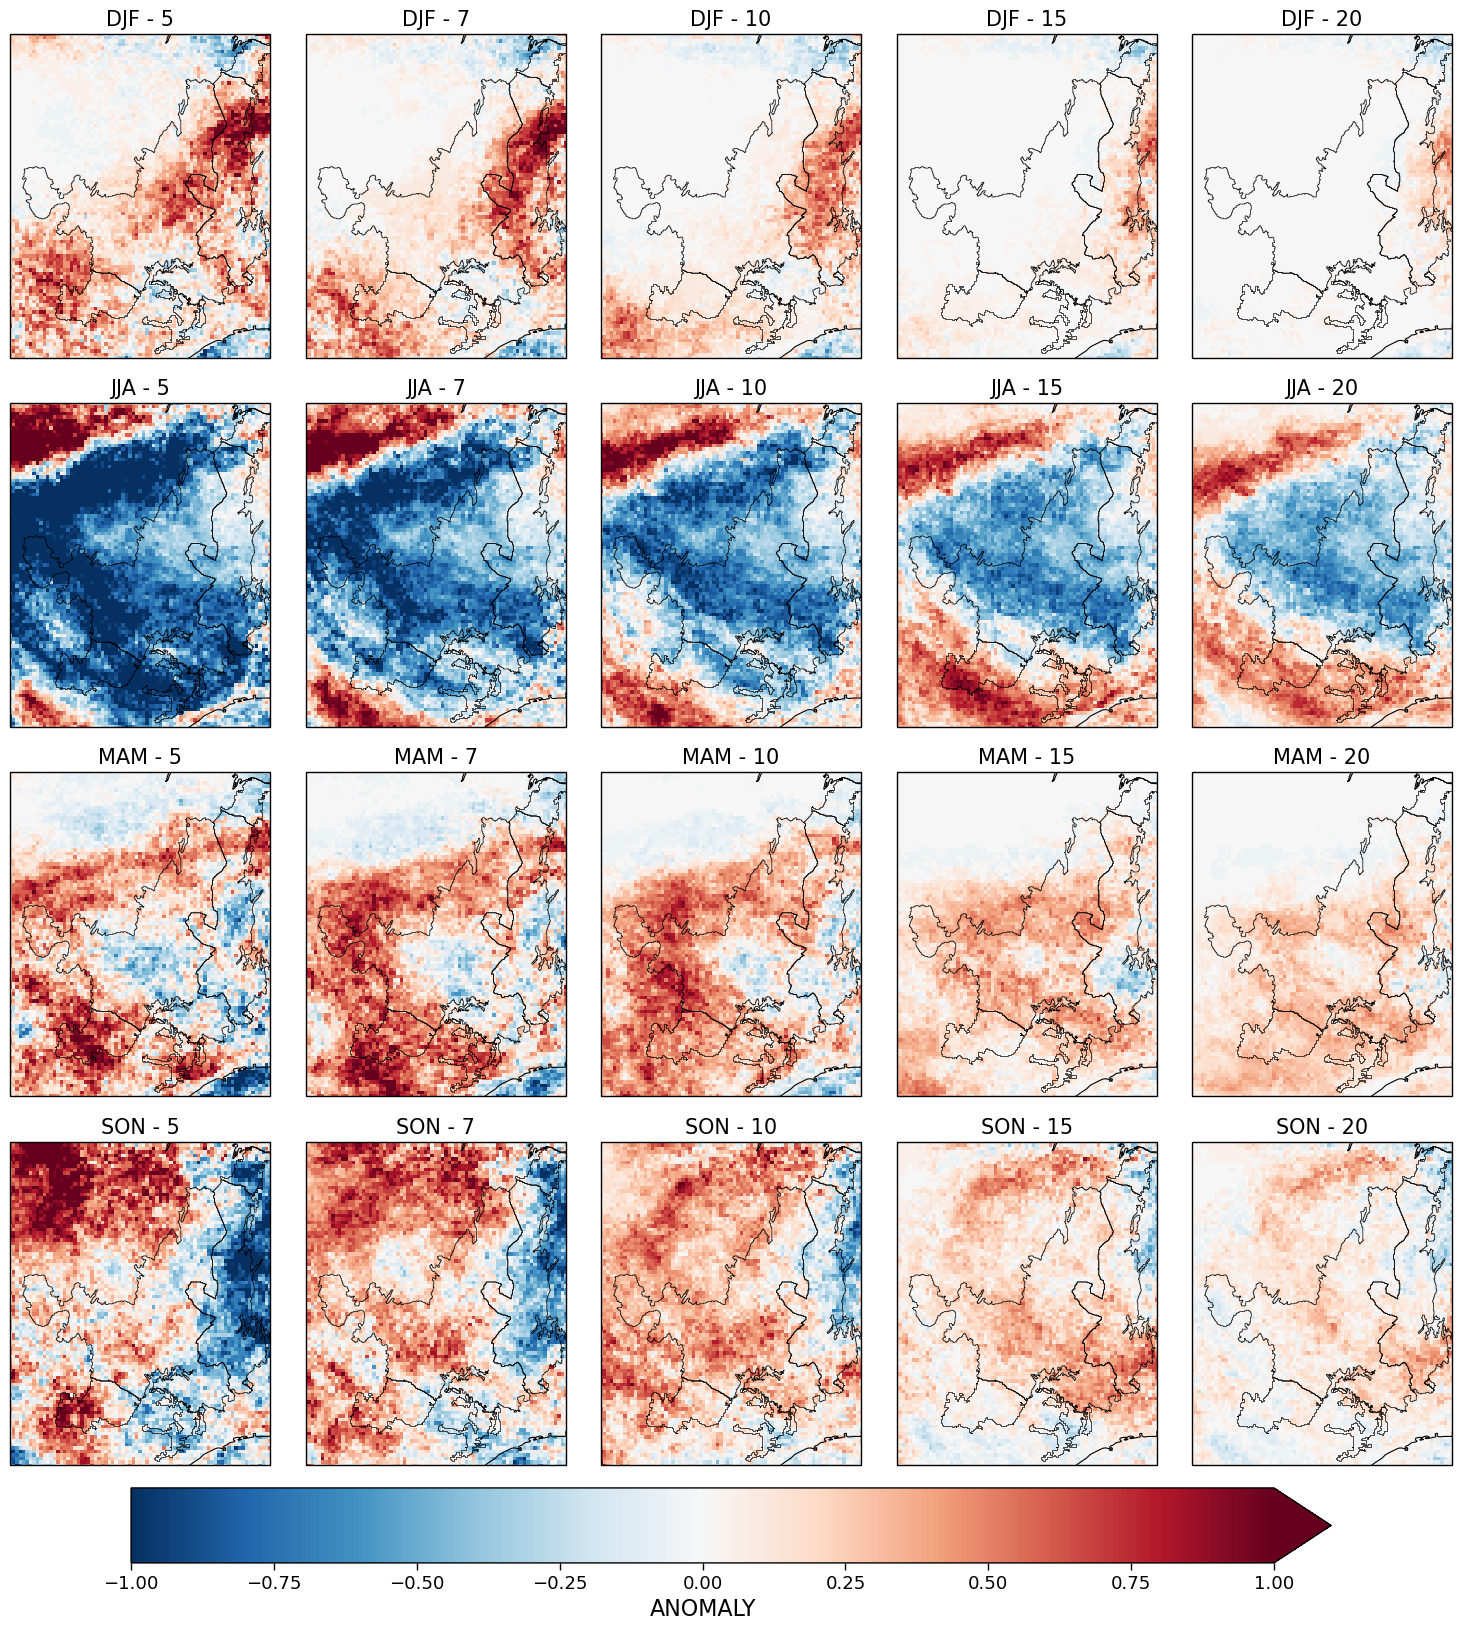

In [109]:
fs = 16
sns.set_context("paper",  rc={"font.size":fs-1,"axes.titlesize":15,"axes.labelsize":fs}) 

#now plot a 4x5 grid with the 5 thresholds and 4 seasons
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})
#loop over the thresholds
for i, threshold in enumerate(ds_anom.threshold):
    #loop over the seasons
    for j, season in enumerate(ds_anom.season):
        #plot the dataarray
        im = ds_anom.sel(season=season, threshold=threshold).CDD.plot(ax=axes[j, i], cmap='RdBu_r', add_colorbar=False, vmin=-1, vmax=1, extend='max')
        #add the title
        axes[j, i].set_title(f'{season.values} - {threshold.values}')
        #add the gridlines
        #axes[j, i].gridlines()
        #add the coastlines
        axes[j, i].coastlines()
        #add the borders of the cerrado regions
        regions.plot(ax=axes[j, i], facecolor="none", edgecolor="black", linewidth=0.5)
        #add the colorbar to the last column
        #if i == 4:
        #    plt.colorbar(ds_anom.sel(season=season, threshold=threshold).CDD.plot(ax=axes[j, i], cmap='viridis', add_colorbar=False), ax=axes[j, i])
        #set extent
        axes[j, i].set_extent([-61, -42, -25, -2])
#create a colorbar in the bottom of the plot
cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='ANOMALY', extend='max')
cbar_ax.tick_params(labelsize=fs-3)
plt.tight_layout()

In [112]:
#thresiold 10 and DJF
ds_test_1 = ds_new_1.sel(season='DJF', threshold=10)
ds_test_1['Region'] = cerrado_mask.mask(ds_test_1, lon_name='lon', lat_name='lat')
ds_test_2 = ds_new_2.sel(season='DJF', threshold=10)
ds_test_2['Region'] = cerrado_mask.mask(ds_test_2, lon_name='lon', lat_name='lat')
ds_test_3 = ds_new.sel(season='DJF', threshold=10)
ds_test_3['Region'] = cerrado_mask.mask(ds_test_3, lon_name='lon', lat_name='lat')
#create a dataframe with the data
df_1 = ds_test_1.to_dataframe().reset_index().dropna()
df_2 = ds_test_2.to_dataframe().reset_index().dropna()
df_3 = ds_test_3.to_dataframe().reset_index().dropna()
#merge with a column with the period
df_1['Period'] = '1981-2000'
df_2['Period'] = '2001-2020'
df_3['Period'] = '1981-2020'
df = pd.concat([df_1, df_2])
#replace Region values for the name
df['Region'] = df['Region'].replace({0:'Central', 1:'Southern', 2:'Eastern'})

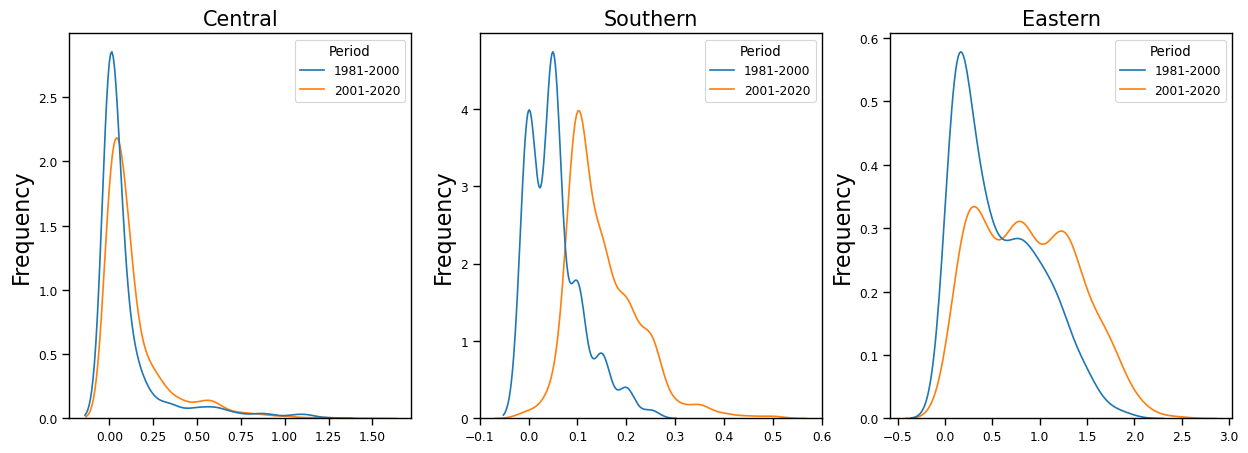

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, region in enumerate(df.Region.unique()):
    sns.kdeplot(data=df[df.Region == region], x='CDD', hue='Period', hue_order=['1981-2000', '2001-2020'], ax=axes[i])

    axes[i].set_title(region)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

In [99]:
#reample by year and season
ds_ts_3 = ds.where(ds.CDD >= 10).sel(time=ds['time.season'] == 'DJF').resample(time='QS-DEC').count(dim='time').chunk({'time': -1, 'lat': 20, 'lon': 20}).load()

ds_ts_3['Region'] = cerrado_mask.mask(ds_ts_3, lon_name='lon', lat_name='lat')
df_ts_3 = ds_ts_3.to_dataframe().reset_index().dropna()
df_ts_3['Region'] = df_ts_3['Region'].replace({0:'Central', 1:'Southern', 2:'Eastern'})

<AxesSubplot: xlabel='time', ylabel='CDD'>

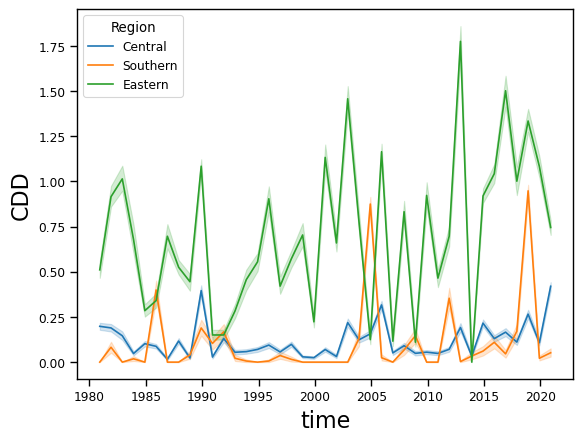

In [101]:
sns.lineplot(data=df_ts_3, x='time', y='CDD', hue='Region', hue_order=['Central', 'Southern', 'Eastern'])

# month

In [121]:
ds_5 = ds.where(ds.CDD >= 5).groupby('time.month').count(dim='time')
ds_7 = ds.where(ds.CDD >= 7).groupby('time.month').count(dim='time')
ds_10 = ds.where(ds.CDD >= 10).groupby('time.month').count(dim='time')
ds_15 = ds.where(ds.CDD >= 15).groupby('time.month').count(dim='time')
ds_20 = ds.where(ds.CDD >= 20).groupby('time.month').count(dim='time')
#take all dataarrays  and create a new dataset, with thresoold as a dimension
ds_new = xr.concat([ds_5, ds_7, ds_10, ds_15, ds_20], dim='threshold').load()
ds_new.coords['threshold'] = [5, 7, 10, 15, 20]
#divide by 40 years to get the frequency
ds_new = ds_new/40



In [116]:
ds_new 

<xarray.Dataset>
Dimensions:    (lon: 77, lat: 93, month: 12, threshold: 5)
Coordinates:
  * lon        (lon) float32 -61.0 -60.75 -60.5 -60.25 ... -42.5 -42.25 -42.0
  * lat        (lat) float32 -25.0 -24.75 -24.5 -24.25 ... -2.75 -2.5 -2.25 -2.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * threshold  (threshold) int32 5 7 10 15 20
Data variables:
    CDD        (threshold, month, lat, lon) float64 1.35 1.35 1.375 ... 0.5 0.6

C:\Users\luisg\AppData\Local\Temp\ipykernel_2524\573088763.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


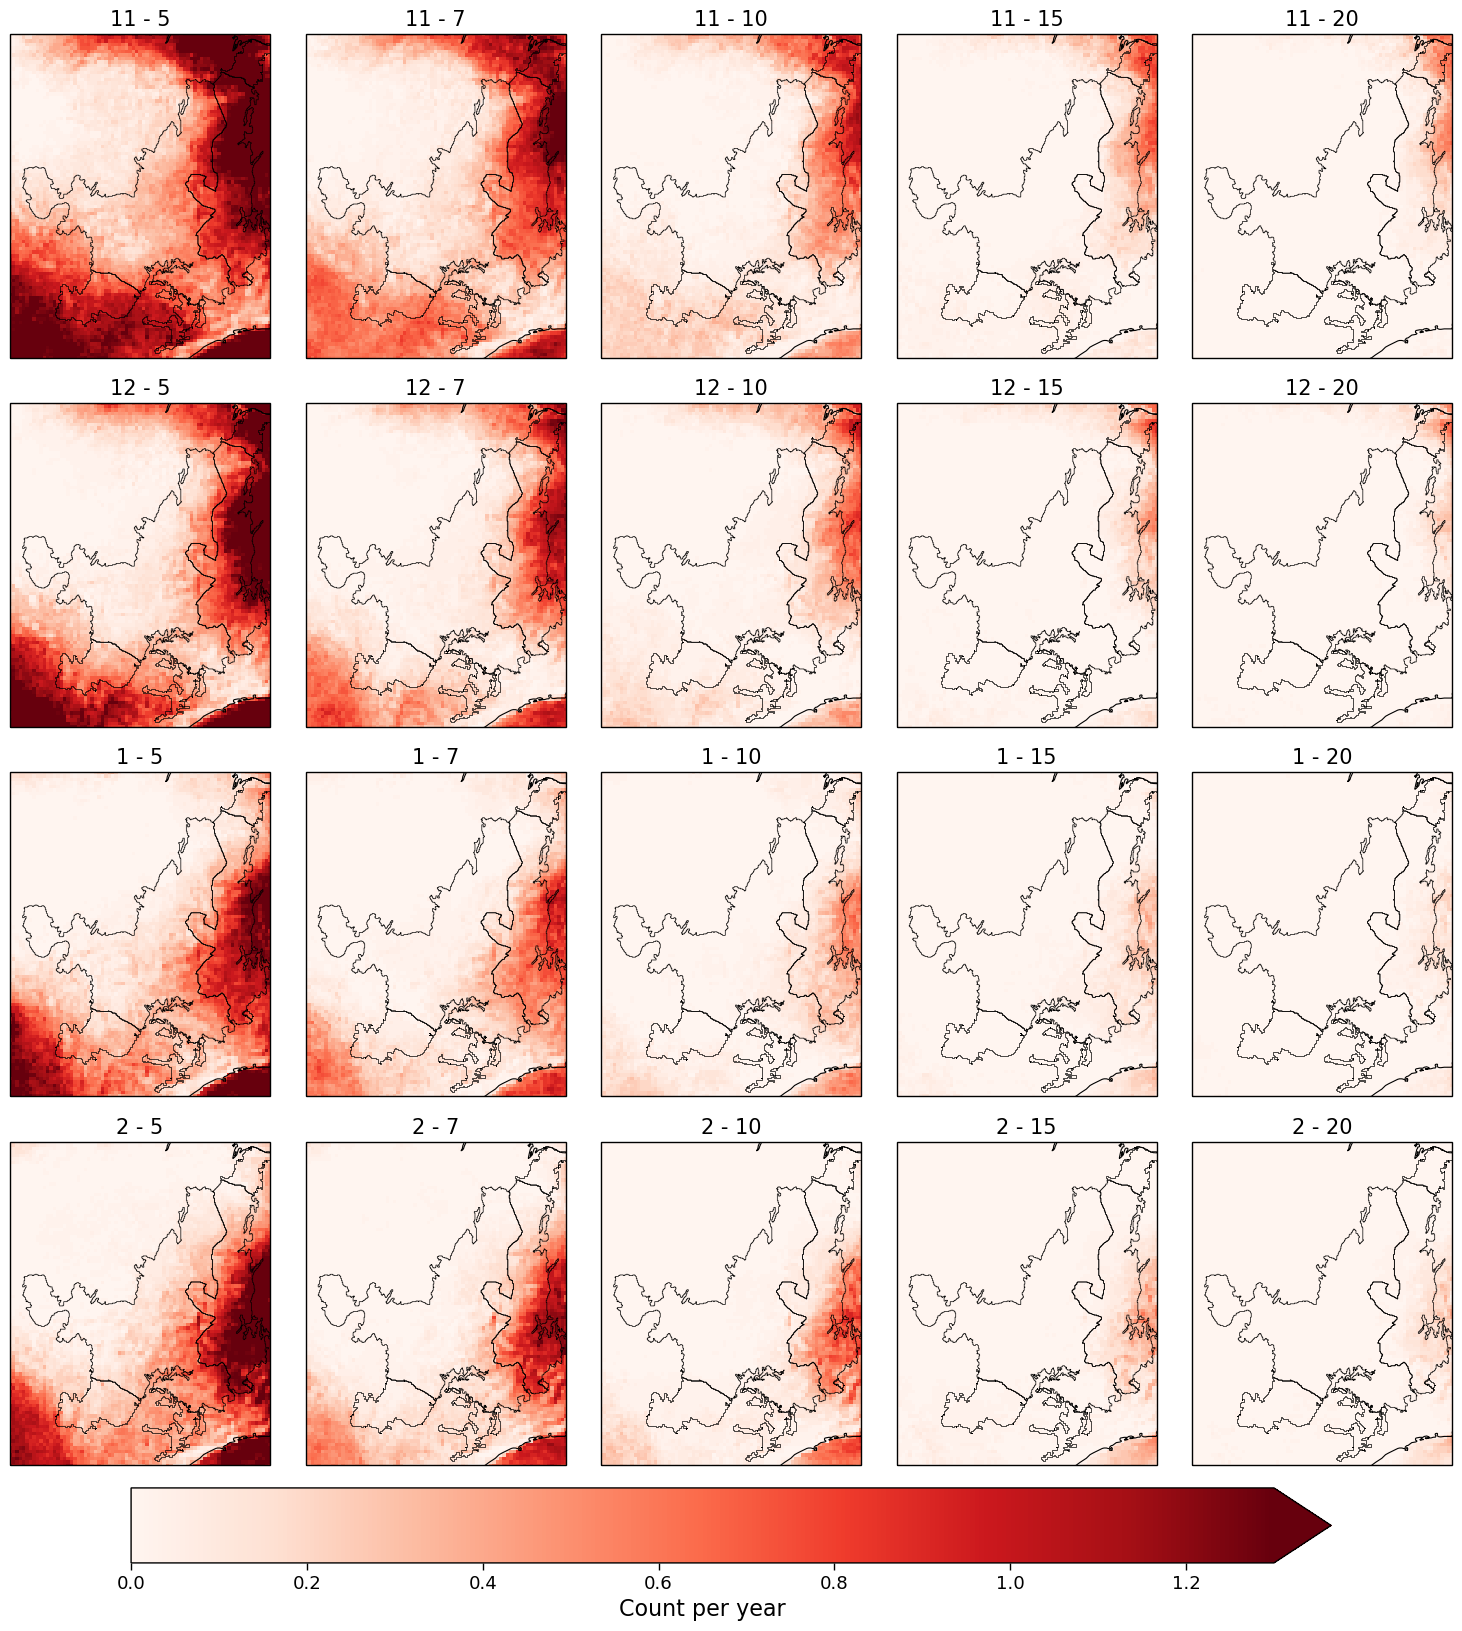

In [119]:
fs = 16
sns.set_context("paper",  rc={"font.size":fs-1,"axes.titlesize":15,"axes.labelsize":fs}) 

#now plot a 4x5 grid with the 5 thresholds and 4 months
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})
#loop over the thresholds
for i, threshold in enumerate(ds_new.threshold):
    #loop over the months
    for j, month in enumerate([11,12,1,2]):
        #plot the dataarray
        im = ds_new.sel(month=month, threshold=threshold).CDD.plot(ax=axes[j, i], cmap='Reds', add_colorbar=False, vmin=0, vmax=1.3, extend='max')
        #add the title
        axes[j, i].set_title(f'{month} - {threshold.values}')
        #add the gridlines
        #axes[j, i].gridlines()
        #add the coastlines
        axes[j, i].coastlines()
        #add the borders of the cerrado regions
        regions.plot(ax=axes[j, i], facecolor="none", edgecolor="black", linewidth=0.5)
        #add the colorbar to the last column
        #if i == 4:
        #    plt.colorbar(ds_new.sel(month=month, threshold=threshold).CDD.plot(ax=axes[j, i], cmap='viridis', add_colorbar=False), ax=axes[j, i])
        #set extent
        axes[j, i].set_extent([-61, -42, -25, -2])
#create a colorbar in the bottom of the plot
cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='Count per year', extend='max')
cbar_ax.tick_params(labelsize=fs-3)
plt.tight_layout()

# COUNT KDE Season

In [129]:
ds_5 = ds_5.load()/40

In [131]:
ds_5['Region'] = cerrado_mask.mask(ds_5, lon_name='lon', lat_name='lat')
df_5 = ds_5.to_dataframe().reset_index().dropna()
df_5['Region'] = df_5['Region'].replace({0:'Central', 1:'Southern', 2:'Eastern'})


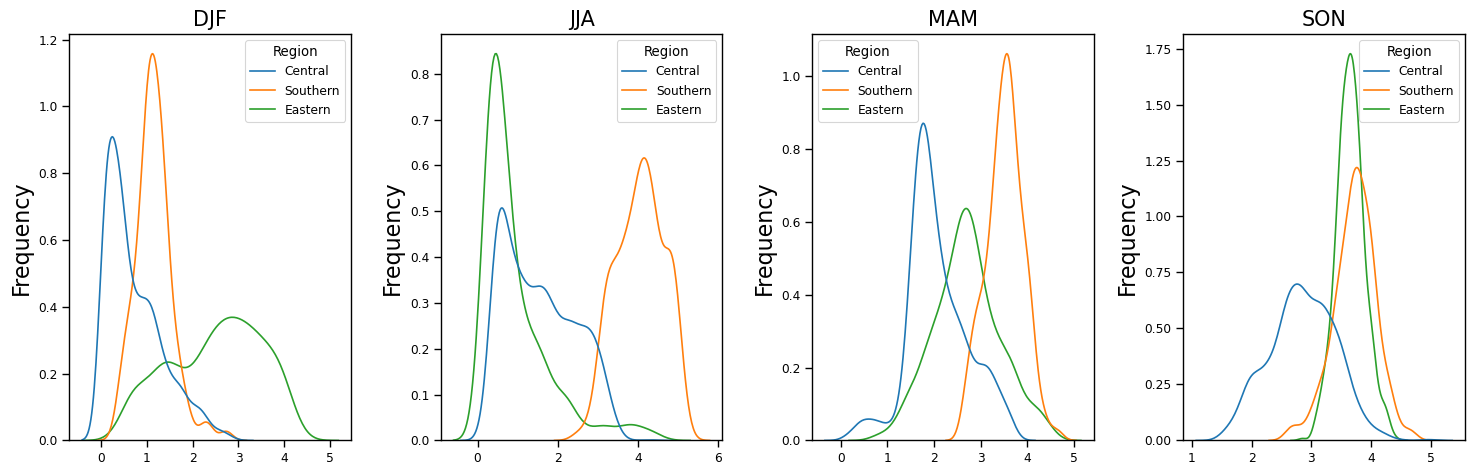

In [135]:
# a plot for each season, with KDE
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
for i, season in enumerate(df_5.season.unique()):
    sns.kdeplot(data=df_5[df_5.season == season], x='CDD', hue='Region', hue_order=['Central', 'Southern', 'Eastern'], ax=axes[i], common_norm=False)

    axes[i].set_title(season)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

# LENGTH


In [138]:
ds = xr.open_dataset("daily_datasets\CDD\\"+ dataset +  ".nc", chunks={'time': -1, 'lat': 10, 'lon': 10})
ds_mean = ds.where(ds.CDD >= 5).groupby('time.season').mean(dim='time').load()


c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\dask\array\reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


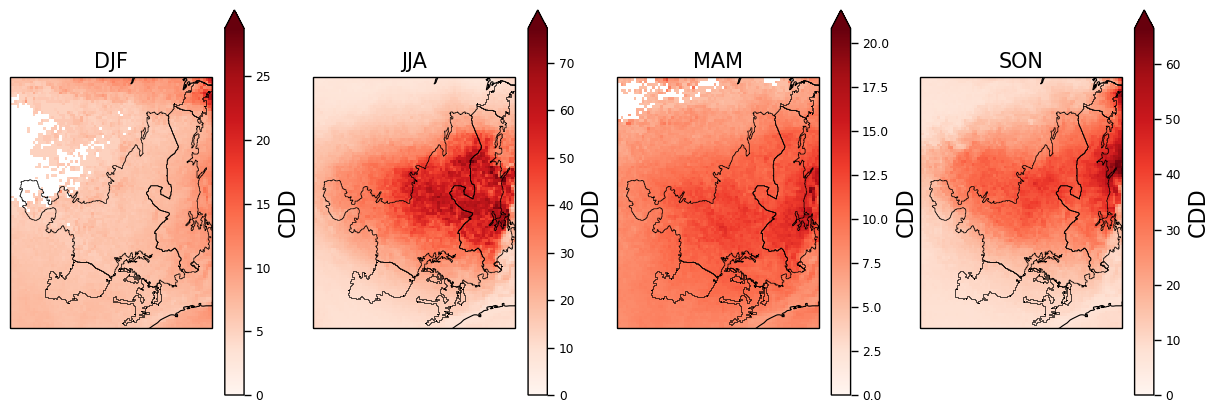

In [144]:
#plot each season for ds_mean
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})
for i, season in enumerate(ds_mean.season):
    im = ds_mean.sel(season=season).CDD.plot(ax=axes[i], cmap='Reds',
                                              add_colorbar=True, vmin=0, extend='max')
    axes[i].set_title(season.values)
    axes[i].coastlines()
    regions.plot(ax=axes[i], facecolor="none", edgecolor="black", linewidth=0.5)
    axes[i].set_extent([-61, -42, -25, -2])
    #axes[i].gridlines()
    #if i == 3:
    #    plt.colorbar(im, ax=axes[i])

In [149]:
# calculate the anomaly between 2001-2020 and 1981-2000
ds_mean_1 = ds.where(ds.CDD >= 5).sel(time= slice('1981-01-01', '2000-12-31')).groupby('time.season').mean(dim='time')
ds_mean_2 = ds.where(ds.CDD >= 5).sel(time= slice('2001-01-01', '2020-12-31')).groupby('time.season').mean(dim='time')
ds_mean_anom = ds_mean_2 - ds_mean_1
ds_mean_anom = ds_mean_anom.load()


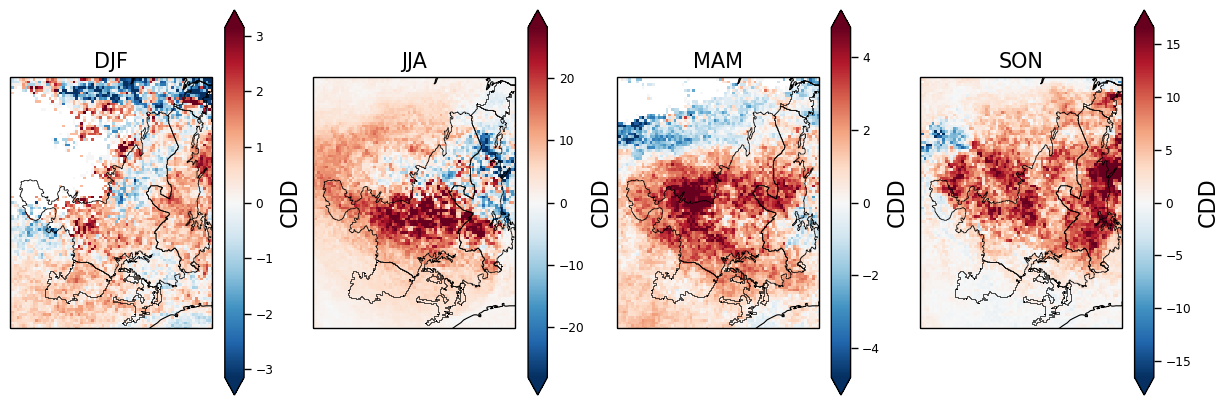

In [155]:
#plot each season for ds_mean_anom
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})
for i, season in enumerate(ds_mean_anom.season):
    im = ds_mean_anom.sel(season=season).CDD.plot(ax=axes[i], cmap='RdBu_r',
                                              add_colorbar=True, robust=True, extend='both')
    axes[i].set_title(season.values)
    axes[i].coastlines()
    regions.plot(ax=axes[i], facecolor="none", edgecolor="black", linewidth=0.5)
    axes[i].set_extent([-61, -42, -25, -2])
    #axes[i].gridlines()
    #if i == 3:
    #    plt.colorbar(im, ax=axes[i])

## ts

In [167]:
ds_mean_ts = ds.where(ds.CDD >= 5).resample(time='QS-DEC').mean(dim='time').load()

In [171]:
ds_mean_ts['Region'] = cerrado_mask.mask(ds_mean_ts, lon_name='lon', lat_name='lat')
df_mean_ts = ds_mean_ts.to_dataframe().reset_index().dropna()
df_mean_ts['Region'] = df_mean_ts['Region'].replace({0:'Central', 1:'Southern', 2:'Eastern'})
#create season column
df_mean_ts['season'] = df_mean_ts['time'].dt.month.apply(lambda x: 'DJF' if x == 12 or x == 1 or x == 2 else 'MAM' if x == 3 or x == 4 or x == 5 else 'JJA' if x == 6 or x == 7 or x == 8 else 'SON')


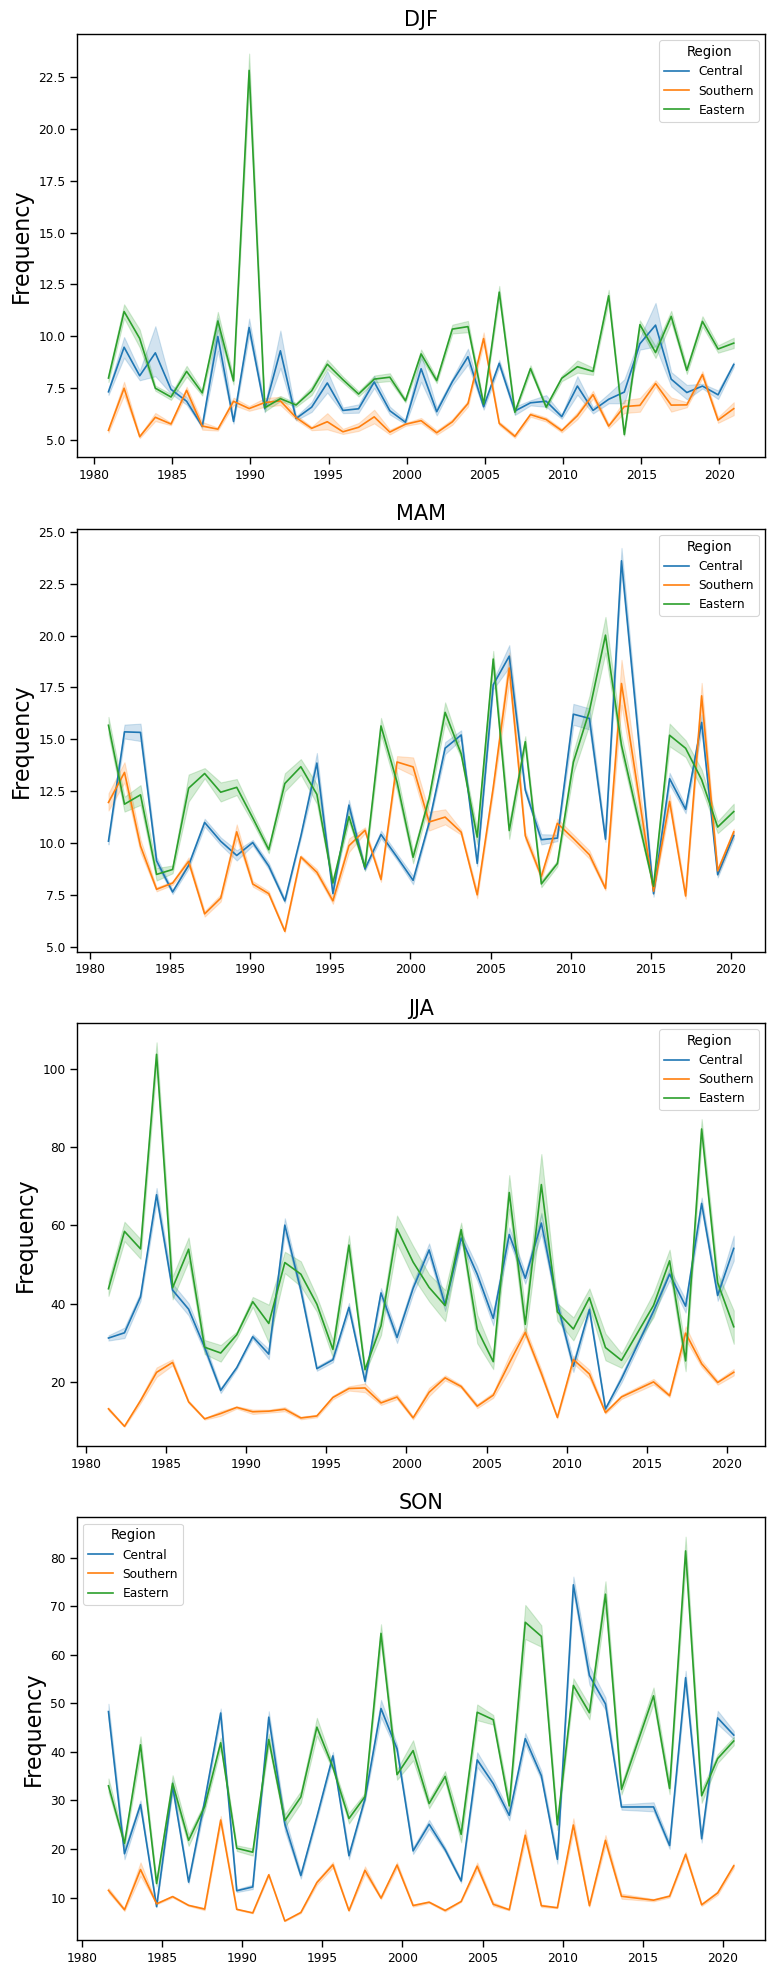

In [173]:
# a plot for each season, the lineplot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 20))
for i, season in enumerate(df_mean_ts.season.unique()):
    sns.lineplot(data=df_mean_ts[df_mean_ts.season == season], x='time', y='CDD', hue='Region', hue_order=['Central', 'Southern', 'Eastern'], ax=axes[i])

    axes[i].set_title(season)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Mean CDD (days)')

plt.tight_layout()

## KDE

In [177]:
ds['Region'] = cerrado_mask.mask(ds, lon_name='lon', lat_name='lat')
df_all = ds.where(ds.CDD >= 5).to_dataframe().reset_index().dropna()
df_all['Region'] = df_all['Region'].replace({0:'Central', 1:'Southern', 2:'Eastern'})
df_all['season'] = df_all['time'].dt.month.apply(lambda x: 'DJF' if x == 12 or x == 1 or x == 2 else 'MAM' if x == 3 or x == 4 or x == 5 else 'JJA' if x == 6 or x == 7 or x == 8 else 'SON')


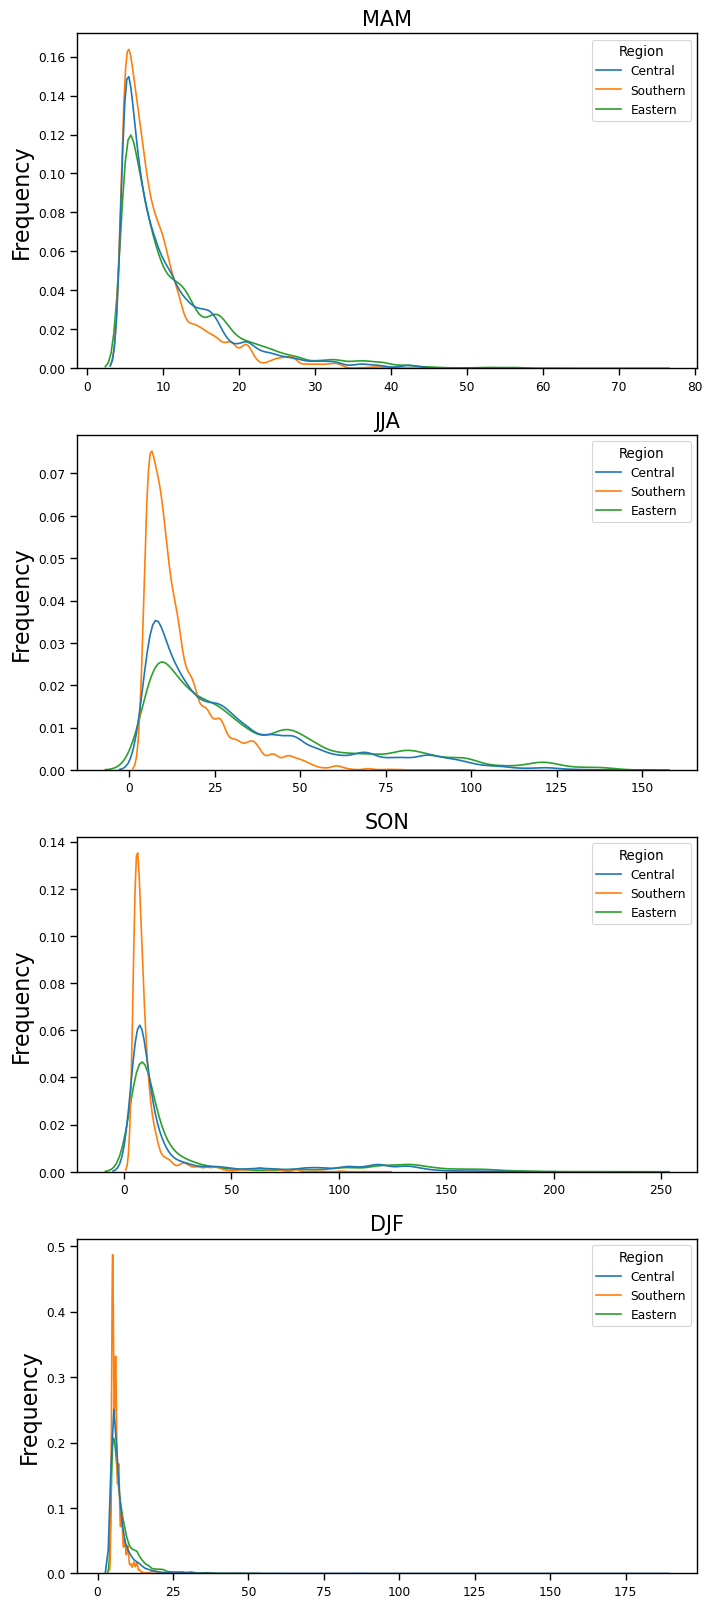

In [179]:
#plot kde for each season
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 20))
for i, season in enumerate(df_all.season.unique()):
    sns.kdeplot(data=df_all[df_all.season == season], x='CDD', hue='Region', hue_order=['Central', 'Southern', 'Eastern'], ax=axes[i], common_norm=False)

    axes[i].set_title(season)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

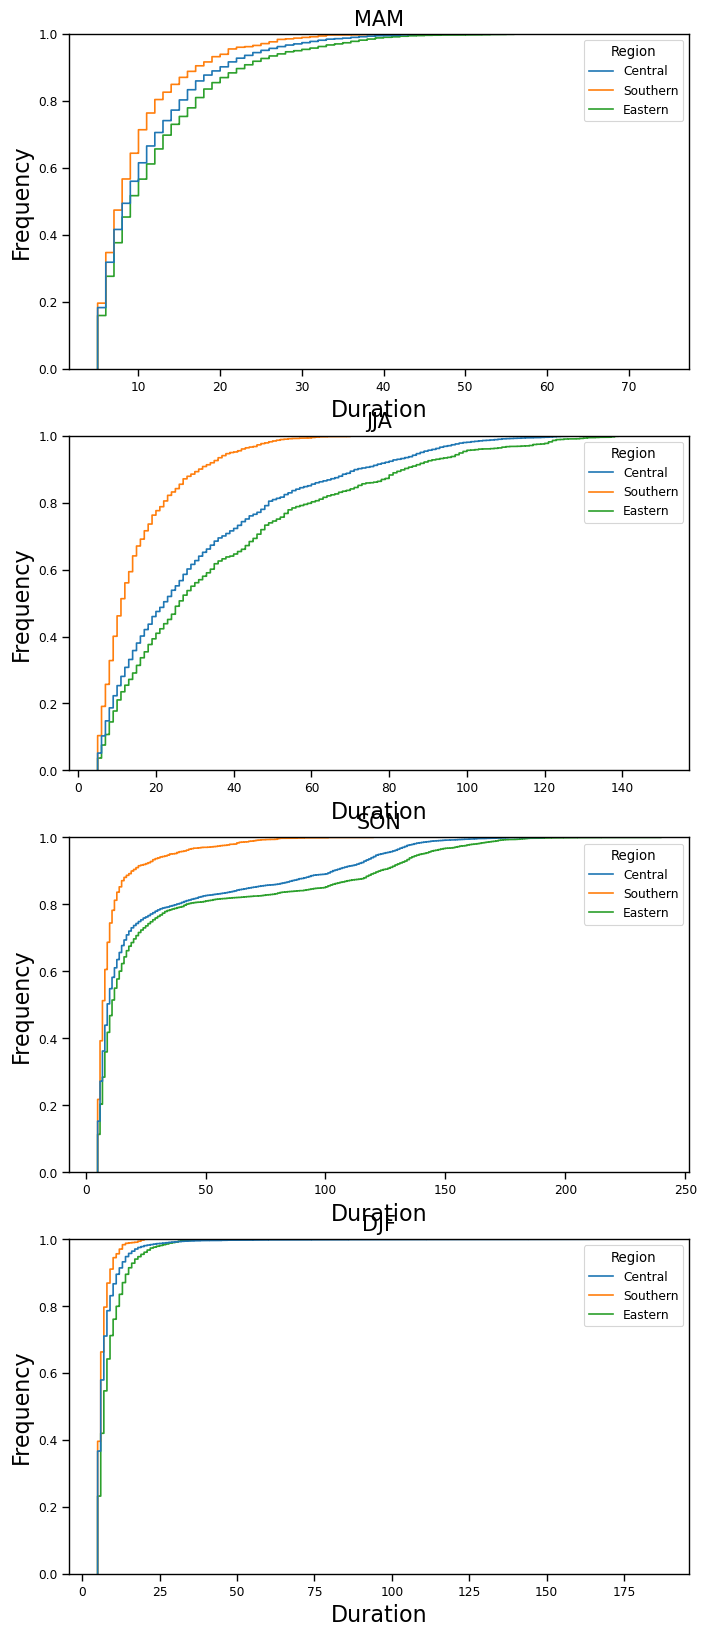

In [186]:
#plot ecdf for each season
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 20))
for i, season in enumerate(df_all.season.unique()):
    sns.ecdfplot(data=df_all[df_all.season == season], x='CDD', hue='Region', hue_order=['Central', 'Southern', 'Eastern'], ax=axes[i])

    axes[i].set_title(season)
    axes[i].set_xlabel('Duration')
    axes[i].set_ylabel('Frequency')

# trend

In [236]:
from pymannkendall import original_test

# functions
def mannkendall_trend(arr):
    if not np.isnan(arr).any():
        result = original_test(arr)
        return result.p, result.slope, result.intercept
    else:
        return np.nan, np.nan, np.nan

def ds_kendall(data, dim):
    results =  xr.apply_ufunc(mannkendall_trend, data.CDD,
                             input_core_dims=[[dim]],
                             output_core_dims=[[], [],[]],
                             vectorize=True,
                             dask='parallelized')
    
    
    # Extract the p-values and Sen's slopes from the results
    p_values = results[0]
    slopes = results[1]
    intercepts = results[2]
    
    # Create a new xarray dataset to store the results
    results_dataset = xr.Dataset({'p_values': p_values, 'slopes': slopes, 'intercepts': intercepts})
    return results_dataset

In [237]:
#just DJF in ds_mean_ts
ds_mean_ts_djf = ds_mean_ts.sel(time=ds_mean_ts['time.season'] == 'DJF')
#fill NaNs with 0
ds_mean_ts_djf = ds_mean_ts_djf.fillna(0)

In [252]:
ds_trends = ds_mean_ts.fillna(0).groupby('time.season').apply(ds_kendall, dim='time')

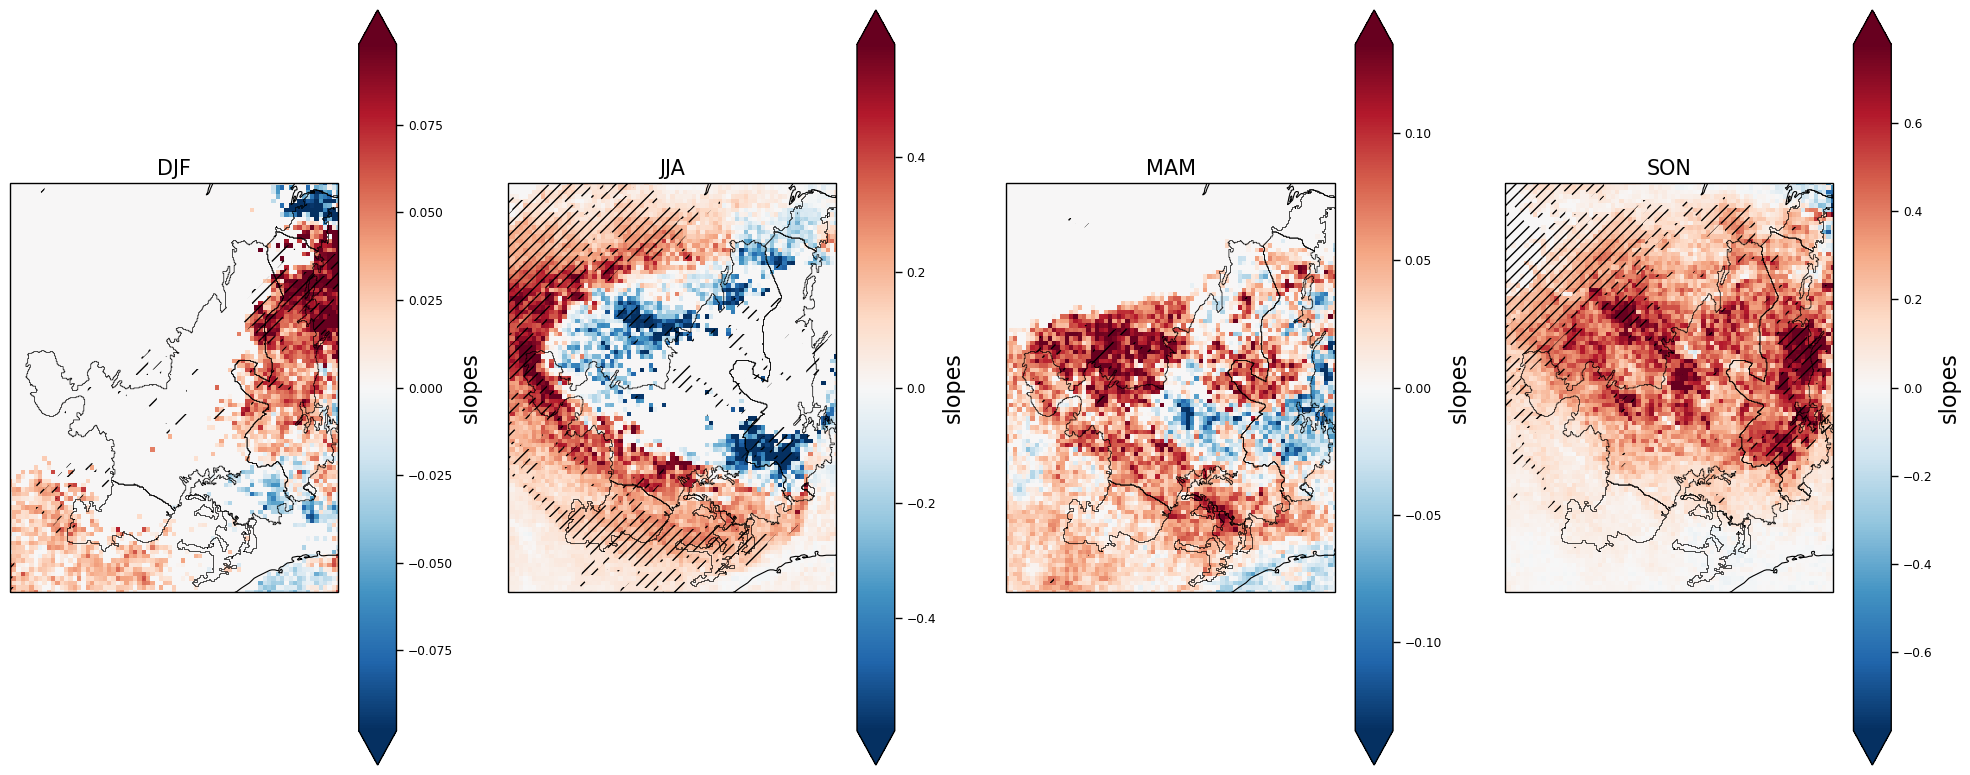

In [265]:
#plot ds_trends for each season
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
for i, season in enumerate(ds_trends.season):
    im = ds_trends.sel(season=season).slopes.plot(ax=axes[i], cmap='RdBu_r',
                                              add_colorbar=True, robust=True, extend='both')
    #hatcj the significant values
    ds_trends.sel(season=season).slopes.where(ds_trends.sel(season=season).p_values < 0.05).plot.contourf(ax=axes[i], colors='none', hatches=['///'], add_colorbar=False)
    axes[i].set_title(season.values)
    axes[i].coastlines()
    regions.plot(ax=axes[i], facecolor="none", edgecolor="black", linewidth=0.5)
    axes[i].set_extent([-61, -42, -25, -2])

plt.tight_layout()

## max mean

In [161]:
ds_max= ds.where(ds.CDD >= 5).resample(time='QS-DEC').max(dim='time').load()

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\dask\array\reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


In [162]:
ds_max_mean = ds_max.groupby('time.season').mean(dim='time')

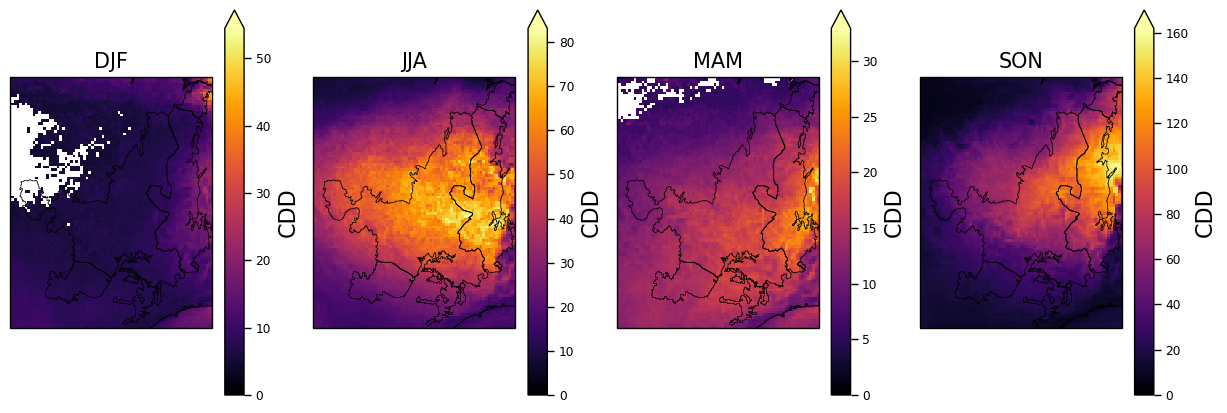

In [164]:
#plot each season for ds_max_mean
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})
for i, season in enumerate(ds_max_mean.season):
    im = ds_max_mean.sel(season=season).CDD.plot(ax=axes[i], cmap='inferno',
                                              add_colorbar=True, vmin=0, extend='max')
    axes[i].set_title(season.values)
    axes[i].coastlines()
    regions.plot(ax=axes[i], facecolor="none", edgecolor="black", linewidth=0.5)
    axes[i].set_extent([-61, -42, -25, -2])
    #axes[i].gridlines()
    #if i == 3:
    #    plt.colorbar(im, ax=axes[i])

In [165]:
# calculate the anomaly between 2001-2020 and 1981-2000
ds_max_mean_1 = ds_max.sel(time= slice('1981-01-01', '2000-12-31')).groupby('time.season').mean(dim='time')
ds_max_mean_2 = ds_max.sel(time= slice('2001-01-01', '2020-12-31')).groupby('time.season').mean(dim='time')
ds_max_mean_anom = ds_max_mean_2 - ds_max_mean_1
ds_max_mean_anom = ds_max_mean_anom.load()

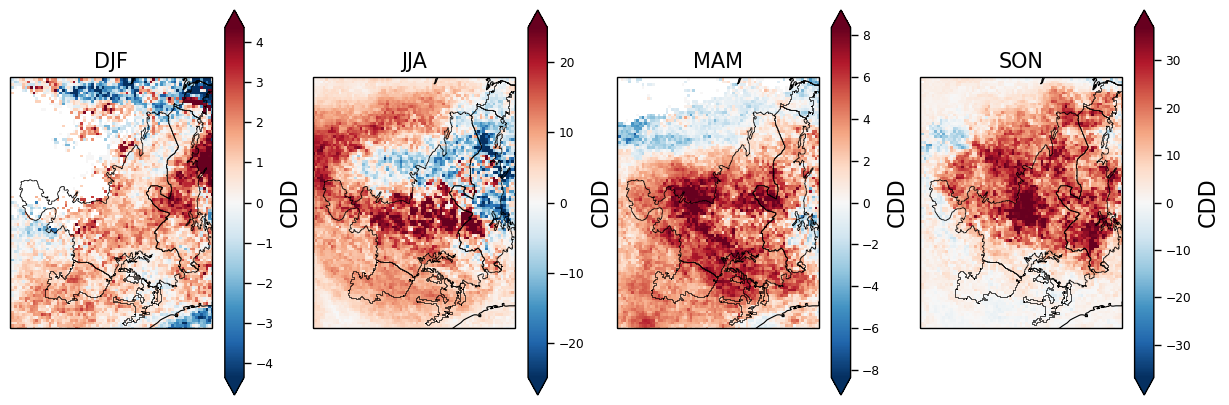

In [166]:
#plot each season for ds_max_mean_anom
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})
for i, season in enumerate(ds_max_mean_anom.season):
    im = ds_max_mean_anom.sel(season=season).CDD.plot(ax=axes[i], cmap='RdBu_r',
                                              add_colorbar=True, robust=True, extend='both')
    axes[i].set_title(season.values)
    axes[i].coastlines()
    regions.plot(ax=axes[i], facecolor="none", edgecolor="black", linewidth=0.5)
    axes[i].set_extent([-61, -42, -25, -2])
    #axes[i].gridlines()
    #if i == 3:
    #    plt.colorbar(im, ax=axes[i])

### ts

In [184]:
#plot lineplot for each season
ds_max_mean_ts = ds_max.resample(time='QS-DEC').mean(dim='time').load()
ds_max_mean_ts['Region'] = cerrado_mask.mask(ds_max_mean_ts, lon_name='lon', lat_name='lat')
df_max_mean_ts = ds_max_mean_ts.to_dataframe().reset_index().dropna()
df_max_mean_ts['Region'] = df_max_mean_ts['Region'].replace({0:'Central', 1:'Southern', 2:'Eastern'})
df_max_mean_ts['season'] = df_max_mean_ts['time'].dt.month.apply(lambda x: 'DJF' if x == 12 or x == 1 or x == 2 else 'MAM' if x == 3 or x == 4 or x == 5 else 'JJA' if x == 6 or x == 7 or x == 8 else 'SON')

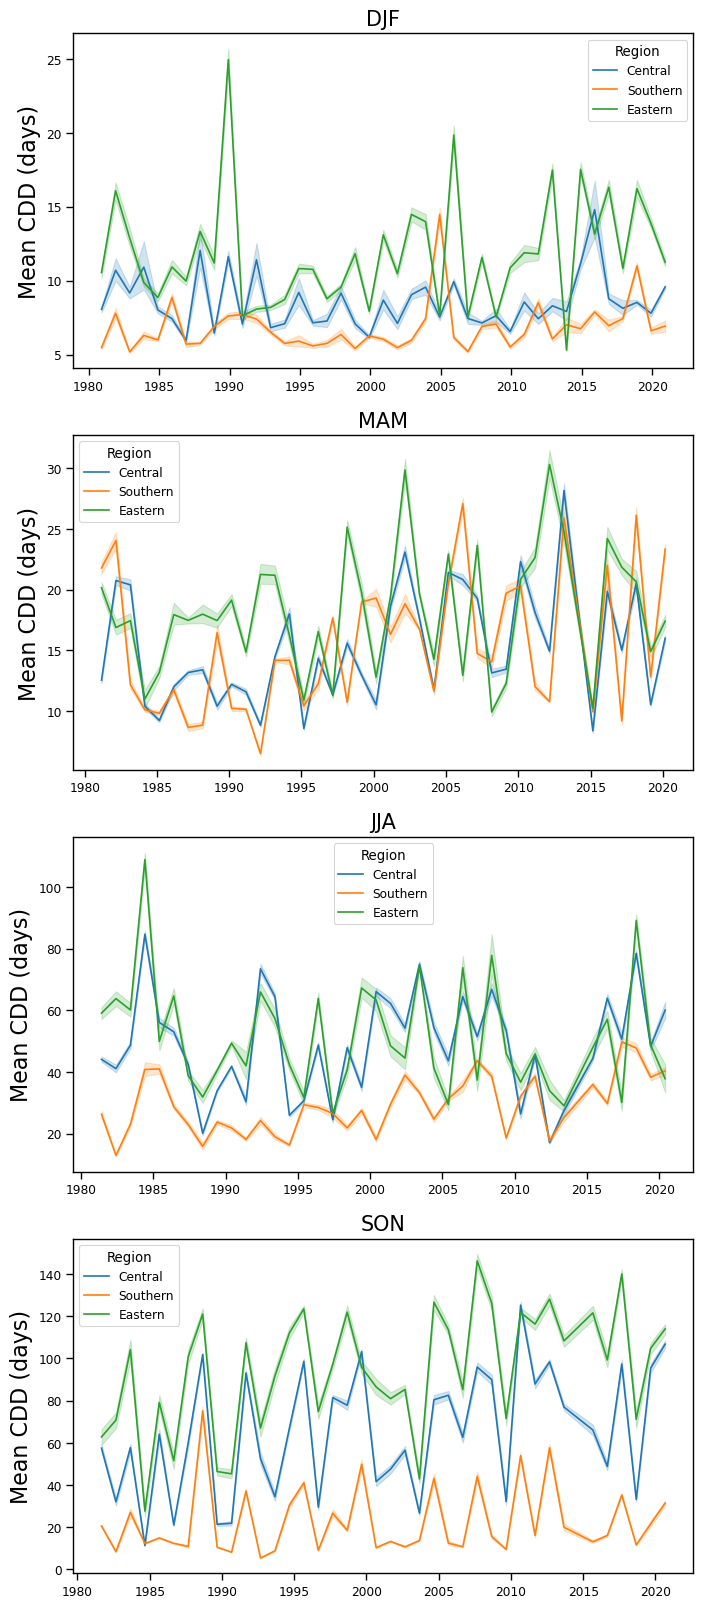

In [185]:
#plot lineplot for each season
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 20))
for i, season in enumerate(df_max_mean_ts.season.unique()):
    sns.lineplot(data=df_max_mean_ts[df_max_mean_ts.season == season], x='time', y='CDD', hue='Region', hue_order=['Central', 'Southern', 'Eastern'], ax=axes[i])

    axes[i].set_title(season)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Mean Max CDD (days)')

# trend


In [266]:
ds_max

<xarray.Dataset>
Dimensions:  (time: 161, lat: 93, lon: 77)
Coordinates:
  * lon      (lon) float32 -61.0 -60.75 -60.5 -60.25 ... -42.5 -42.25 -42.0
  * lat      (lat) float32 -25.0 -24.75 -24.5 -24.25 ... -2.75 -2.5 -2.25 -2.0
  * time     (time) datetime64[ns] 1980-12-01 1981-03-01 ... 2020-12-01
Data variables:
    CDD      (time, lat, lon) float64 nan nan nan nan ... 13.0 14.0 14.0 14.0

In [267]:
ds_trends_max = ds_max.fillna(0).groupby('time.season').apply(ds_kendall, dim='time')


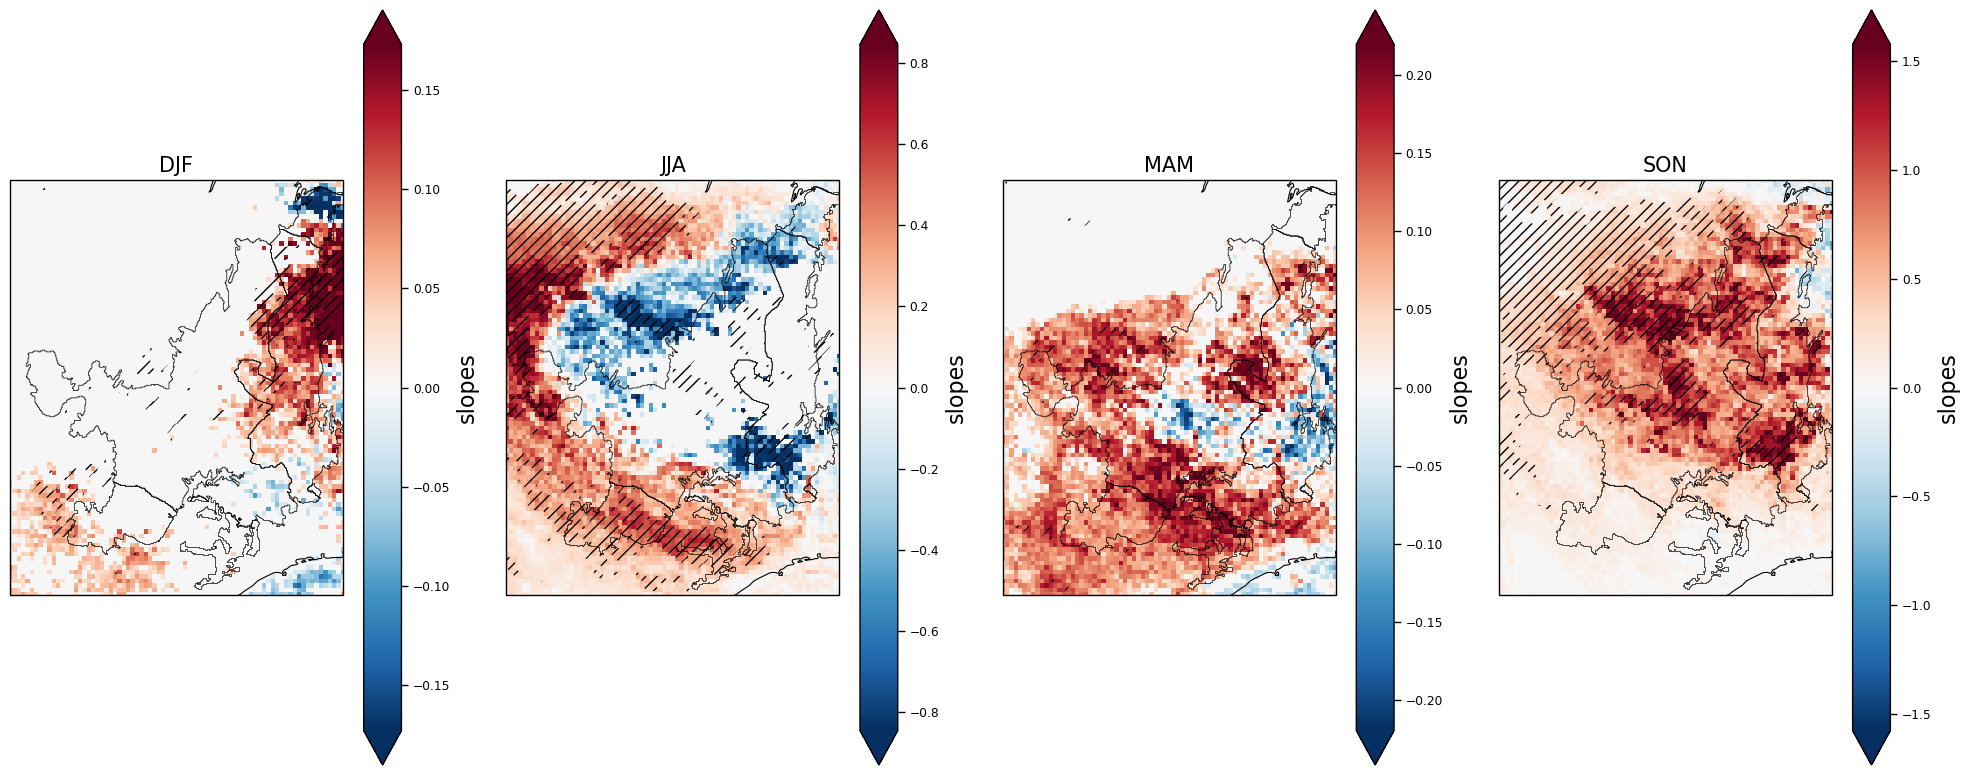

In [268]:
#plot ds_trends_max for each season
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
for i, season in enumerate(ds_trends_max.season):
    im = ds_trends_max.sel(season=season).slopes.plot(ax=axes[i], cmap='RdBu_r',
                                              add_colorbar=True, robust=True, extend='both')
    #hatcj the significant values
    ds_trends_max.sel(season=season).slopes.where(ds_trends_max.sel(season=season).p_values < 0.05).plot.contourf(ax=axes[i], colors='none', hatches=['///'], add_colorbar=False)
    axes[i].set_title(season.values)
    axes[i].coastlines()
    regions.plot(ax=axes[i], facecolor="none", edgecolor="black", linewidth=0.5)
    axes[i].set_extent([-61, -42, -25, -2])

plt.tight_layout()

# SUM

In [269]:
ds_sum = ds.where(ds.CDD >= 5).resample(time='QS-DEC').sum(dim='time').load()

In [270]:
ds_trends_sum = ds_sum.fillna(0).groupby('time.season').apply(ds_kendall, dim='time')

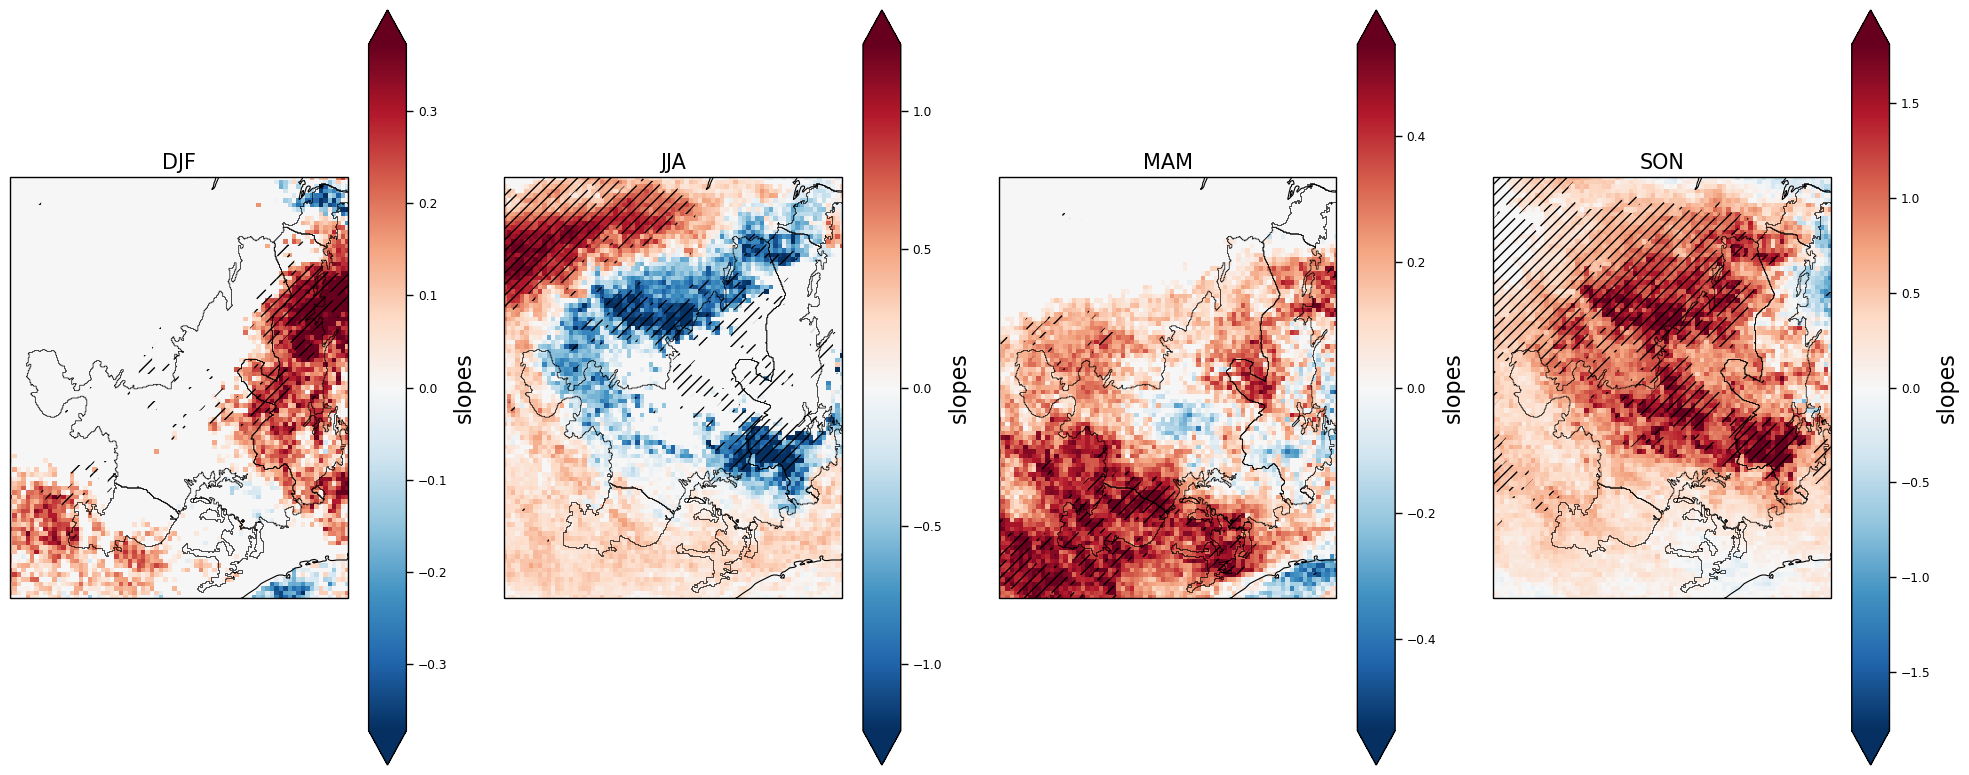

In [271]:
#plot ds_trends_sum for each season
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
for i, season in enumerate(ds_trends_sum.season):
    im = ds_trends_sum.sel(season=season).slopes.plot(ax=axes[i], cmap='RdBu_r',
                                              add_colorbar=True, robust=True, extend='both')
    #hatcj the significant values
    ds_trends_sum.sel(season=season).slopes.where(ds_trends_sum.sel(season=season).p_values < 0.05).plot.contourf(ax=axes[i], colors='none', hatches=['///'], add_colorbar=False)
    axes[i].set_title(season.values)
    axes[i].coastlines()
    regions.plot(ax=axes[i], facecolor="none", edgecolor="black", linewidth=0.5)
    axes[i].set_extent([-61, -42, -25, -2])

plt.tight_layout()